# Analyse phase

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
set_data = pd.read_csv('set_lvl_data.csv')
set_data.head()

,year,Theme name,Sets Name,Set Price,Number of reviews,Star rating
0,2016,Skylines,London,53.355600,23,4.7
1,2017,Friends,Puppy Parade,14.511100,1,4.0
2,2016,Angry Birds,Bird Island Egg Heist,30.591100,2,4.5
3,2017,Creator 3-in-1,Green Cruiser,12.736886,6,4.5
4,2014,Trains,Cargo Train,224.402362,35,4.4


In [7]:
set_data.describe()

,year,Set Price,Number of reviews,Star rating
count,750.000000,750.000000,750.000000,750.000000
mean,2013.741333,62.779383,15.841333,4.549851
std,9.514504,86.340389,30.459457,0.441315
min,1957.000000,2.956552,1.000000,2.200000
25%,2015.000000,18.097362,3.000000,4.400000
50%,2017.000000,30.882910,8.000000,4.600000
75%,2018.000000,78.991100,16.000000,4.900000
max,2023.000000,795.544014,337.000000,5.000000


In [31]:
def classify_sets_by_price(set_price):
    if set_price < 100:
        return 'low'
    elif set_price < 250:
        return 'medium'
    else:
        return 'high'

def classify_sets_by_rating(set_rating):
    if set_rating < 3:
        return 'low'
    elif set_rating < 4.5:
        return 'medium'
    else:
        return 'high'

def classify_sets_by_review_count(review_count):
    if review_count < 8:
        return 'low'
    elif review_count < 20:
        return 'medium'
    else:
        return 'high'


In [32]:
set_data['price_category'] = set_data['Set Price'].apply(classify_sets_by_price)
set_data['review_count_category'] = set_data['Number of reviews'].apply(classify_sets_by_review_count)
set_data['star_category'] = set_data['Star rating'].apply(classify_sets_by_rating)

<AxesSubplot:xlabel='year', ylabel='Set Price'>

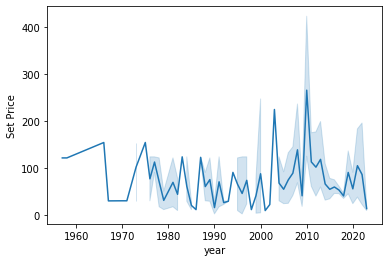

In [33]:
# Plot the responses for different events and regions
sns.lineplot(x="year", y='Set Price',data=set_data)

<AxesSubplot:xlabel='year', ylabel='Set Price'>

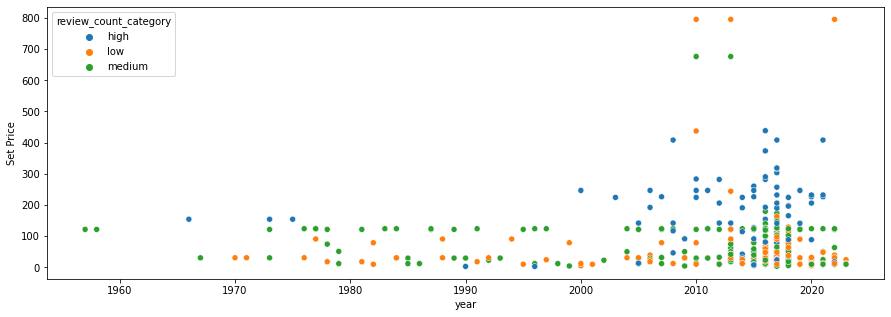

In [35]:
# Plot the responses for year and set prices
f, ax = plt.subplots(figsize=(15, 5))
sns.scatterplot(x="year", y='Set Price',data=set_data, ax=ax, hue='review_count_category')

Prices seems to be mostly below 200 but starting around 2010 lego has started to make more expensive sets <br/>
Are the more expensive sets gathering better score? (star rating)

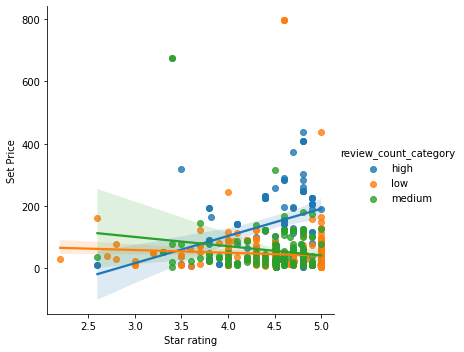

In [36]:
# Show the results of a linear regression within each dataset
sns.lmplot(
    data=set_data, y="Set Price", x="Star rating", hue='review_count_category'
)

Doesn't seem like the more expensive sets have better ratings outright<br/>
It does seem like a high review count correlates positively with the higher price, seems like the shoppers for higher value sets are more involved - good thing

<AxesSubplot:xlabel='year', ylabel='Count'>

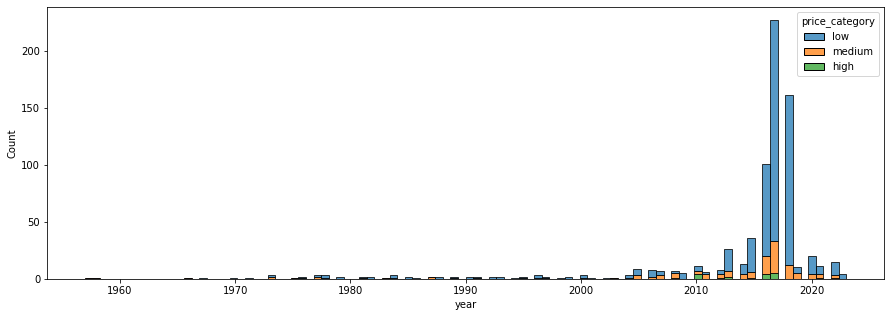

In [38]:
# plot the swet counts per year
f, ax = plt.subplots(figsize=(15, 5))
sns.histplot(
    data=set_data,
    x="year",
    hue='price_category',
    multiple="stack"
)

The amount of sets produced has started to incease around 2005.<br/>
The volumne increase seems mostly driven by low value sets

<AxesSubplot:xlabel='year', ylabel='Count'>

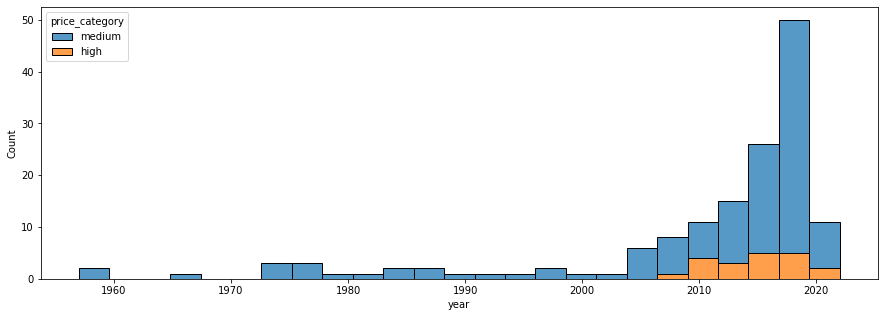

In [41]:
# plot the swet counts per year
f, ax = plt.subplots(figsize=(15, 5))
sns.histplot(
    data=set_data[set_data['price_category'].isin(['high', 'medium'])],
    x="year",
    hue='price_category',
    multiple="stack"
)

As initially noted it seems that even though most of the volume of lego sets is inded lead by low price sets we see that medium and high value sets started to become prevalent from 2005 onwards and have shown good growth.<br/>
If we had sales figures it would be nice to understand how much of the bottom line was driven by the high value sets.

In [42]:
set_data.groupby(['price_category'])['Number of reviews'].mean()

price_category
high      57.000000
low       10.049917
medium    36.441860
Name: Number of reviews, dtype: float64

We do see a positive relationship between the price category and number of reviews.<br/>
As expected, the high value items create more engagement.

# checking the tops

## Price

In [44]:
set_data.sort_values("Set Price",ascending=False).head(10)

,year,Theme name,Sets Name,Set Price,Number of reviews,Star rating,price_category,review_count_category,star_category
375,2013,Educational and Dacta,Identity and Landscape Kit,795.544014,7,4.6,high,low,high
295,2010,Educational and Dacta,Identity and Landscape Kit,795.544014,7,4.6,high,low,high
298,2022,Educational and Dacta,Identity and Landscape Kit,795.544014,7,4.6,high,low,high
615,2010,Educational and Dacta,Connections Kit,676.352862,8,3.4,high,medium,medium
734,2013,Educational and Dacta,Connections Kit,676.352862,8,3.4,high,medium,medium
161,2016,Ghostbusters,Firehouse Headquarters,438.364405,130,4.8,high,high,high
624,2010,Educational and Dacta,Window Exploration Bag,437.422924,2,5.0,high,low,high
595,2021,Architecture,Taj Mahal,408.402500,43,4.8,high,high,high
640,2017,Creator Expert,Taj Mahal,408.402500,43,4.8,high,high,high
730,2008,Creator Expert,Taj Mahal,408.402500,43,4.8,high,high,high


## Review count

In [45]:
set_data.sort_values('Number of reviews',ascending=False).head(10)

,year,Theme name,Sets Name,Set Price,Number of reviews,Star rating,price_category,review_count_category,star_category
172,2011,Creator Expert,Volkswagen T1 Camper Van,123.816648,337,4.7,medium,high,high
99,2010,Creator Expert,Tower Bridge,283.520457,228,4.8,high,high,high
164,2014,Modular Buildings,Parisian Restaurant,191.073790,202,4.9,medium,high,high
697,2015,Ultimate Collector Series,Slave I,246.829979,201,4.8,medium,high,high
625,2019,Star Wars,Slave I,246.829979,201,4.8,medium,high,high
79,2006,Star Wars,Slave I,246.829979,201,4.8,medium,high,high
178,2000,Star Wars,Slave I,246.829979,201,4.8,medium,high,high
699,2011,Star Wars,Slave I,246.829979,201,4.8,medium,high,high
484,2010,Star Wars,Slave I,246.829979,201,4.8,medium,high,high
732,1996,Service Packs,Brick Separator,2.956552,180,4.8,low,high,high
